In [1]:
# 0. Pacotes
import pandas as pd
from unicodedata import normalize
from bs4 import BeautifulSoup
import urllib.request
import networkx as nx
import matplotlib.pyplot as plt
import operator
import collections

In [2]:
# 1. Dados
df_reembolsos = pd.read_csv("/home/gustavo/Downloads/Redes/Datasets/reembolso_4.csv", delimiter = ',')  # junção de tabelas baixadas em http://www2.camara.leg.br/transparencia/cota-para-exercicio-da-atividade-parlamentar/dados-abertos-cota-parlamentar
df_reembolsos = df_reembolsos[df_reembolsos.txtCNPJCPF.notnull()]  # desprezando casos em qISO-8859-1ue o cnpj da empresa é nulo.
df_reembolsos = df_reembolsos[df_reembolsos["numAno"] > 2014]  # focando nos reembolsos a partir de 2015

/home/gustavo/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (28) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# Mapeando os nomes da legislatura passada
df_reembolsos = df_reembolsos.rename(columns={'txNomeParlamentar':'nome'})
df_nomes = pd.read_excel('/home/gustavo/Downloads/deputados.xlsx')
df_nomes = df_nomes.drop_duplicates('nome')
df_reembolsos['nome'] = df_reembolsos['nome'].map(df_nomes.set_index('nome')['nomeCivil']) 
df_reembolsos.dropna(subset=['nome'])

,nome,ideCadastro,nuCarteiraParlamentar,nuLegislatura,sgUF,sgPartido,codLegislatura,numSubCota,txtDescricao,numEspecificacaoSubCota,...,numMes,numAno,numParcela,txtPassageiro,txtTrecho,numLote,numRessarcimento,vlrRestituicao,nuDeputadoId,ideDocumento
752,SÍLVIO SERAFIM COSTA,4930.0,160.0,2015.0,PE,AVANTE,55.0,1.0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,0.0,...,1.0,2018.0,0.0,NaN,NaN,1470218.0,NaN,NaN,1973.0,6516403
753,SÍLVIO SERAFIM COSTA,4930.0,160.0,2015.0,PE,AVANTE,55.0,1.0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,0.0,...,2.0,2018.0,0.0,NaN,NaN,1475409.0,NaN,NaN,1973.0,6529805
754,SÍLVIO SERAFIM COSTA,4930.0,160.0,2015.0,PE,AVANTE,55.0,1.0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,0.0,...,3.0,2018.0,0.0,NaN,NaN,1484081.0,NaN,NaN,1973.0,6551866
755,SÍLVIO SERAFIM COSTA,4930.0,160.0,2015.0,PE,AVANTE,55.0,1.0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,0.0,...,5.0,2018.0,0.0,NaN,NaN,1506914.0,NaN,NaN,1973.0,6610155
756,SÍLVIO SERAFIM COSTA,4930.0,160.0,2015.0,PE,AVANTE,55.0,1.0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,0.0,...,6.0,2018.0,0.0,NaN,NaN,1515253.0,NaN,NaN,1973.0,6633681
757,SÍLVIO SERAFIM COSTA,4930.0,160.0,2015.0,PE,AVANTE,55.0,1.0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,0.0,...,4.0,2018.0,0.0,NaN,NaN,1508907.0,NaN,NaN,1973.0,6616109
758,SÍLVIO SERAFIM COSTA,4930.0,160.0,2015.0,PE,AVANTE,55.0,1.0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,0.0,...,8.0,2018.0,0.0,NaN,NaN,1530300.0,NaN,NaN,1973.0,6674352
759,SÍLVIO SERAFIM COSTA,4930.0,160.0,2015.0,PE,AVANTE,55.0,1.0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,0.0,...,9.0,2018.0,0.0,NaN,NaN,1534724.0,NaN,NaN,1973.0,6687297
760,SÍLVIO SERAFIM COSTA,4930.0,160.0,2015.0,PE,AVANTE,55.0,1.0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,0.0,...,11.0,2018.0,0.0,NaN,NaN,1549640.0,NaN,NaN,1973.0,6726212
761,SÍLVIO SERAFIM COSTA,4930.0,160.0,2015.0,PE,AVANTE,55.0,1.0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,0.0,...,7.0,2018.0,0.0,NaN,NaN,1525021.0,NaN,NaN,1973.0,6659806


In [25]:
df_reembolso_resumo.loc[df_reembolso_resumo['num_agente_politico'] == 141553.0]

,partido,uf,num_agente_politico,fornecedor,cnpj_cpf_empresa,soma_valor_reembolso,qtde_reembolsos,nome_completo
159224,PSDB,SP,141553.0,'TELEFÔNICA BRASIL S/A - VIVO,2558157000162,1468.43,1,VANDERLEI MACRIS
159225,PSDB,SP,141553.0,1259CONC. ROD. INT. PAULISTA S.A.,3207703000183,13.30,2,VANDERLEI MACRIS
159226,PSDB,SP,141553.0,158085Conc. Sistema Anhanguera-Bandeirantes S/A,2451848000162,6.80,1,VANDERLEI MACRIS
159227,PSDB,SP,141553.0,159091Conc. Sistema Anhanguera-Bandeirantes S/A,2451848000162,7.10,1,VANDERLEI MACRIS
159228,PSDB,SP,141553.0,171591CONC. SISTEMA ANHANGUERA-BANDEIRANTES S/A,2451848000162,9.20,1,VANDERLEI MACRIS
159229,PSDB,SP,141553.0,173928Conc. Sistema Anhanguera-Bandeirantes S/A,2451848000162,8.70,1,VANDERLEI MACRIS
159230,PSDB,SP,141553.0,193960AUTO POSTO NOVA AMERICANA LTDA.,7370543000140,100.00,1,VANDERLEI MACRIS
159231,PSDB,SP,141553.0,2D BUREAU GRAFICA E EDITORA,17642811000199,320.00,1,VANDERLEI MACRIS
159232,PSDB,SP,141553.0,A TRIGUEIRA PAES E DOCES LTDA EPP,9177815000115,53.43,2,VANDERLEI MACRIS
159233,PSDB,SP,141553.0,A TRIGUEIRA PAES E DOCES LTDA EPP,9177815000115,38.50,1,VANDERLEI MACRIS


In [ ]:
'''
# 1.1. Criando dicionário com identificador e nome completo do deputado (será necessário porque a tabecdla de reembolsos não tem o nome completo, só o apelido)

page = urllib.request.urlopen("https://dadosabertos.camara.leg.br/api/v2/deputados?idLegislatura=55&itens=100&pagina=1")  # link com os dados básicos dos deputados
soup = BeautifulSoup(page, 'lxml')
lista_dados_deputados = soup.find_all('deputados_')

def remover_acentos(txt):
    return normalize("NFKD", txt).encode("ASCII", "ignore").decode("ASCII")

deputados_dict = {}
for i in range(0,len(lista_dados_deputados)):
    deputados_dict[lista_dados_deputados[i].idecadastro.string] = [remover_acentos(lista_dados_deputados[i].nome.string), lista_dados_deputados[i].urlfoto.string]
'''

In [4]:
df_receitas = pd.read_csv("/home/gustavo/Downloads/Redes/Datasets/receitas_candidatos_2014_brasil .csv", delimiter=';')  # csv baixado em http://www.tse.jus.br/eleicoes/estatisticas/repositorio-de-dados-eleitorais
df_receitas = df_receitas[df_receitas["Cargo"] == "Deputado Federal"] # somente deputados federais

/home/gustavo/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
#Tabela 4 (coloque colunas com informações dos deputados, das empresas e o valor da doação)
df_receitas

,Sequencial Candidato,UF,Sigla Partido,Numero candidato,Cargo,Nome candidato,CPF do candidato,Numero Recibo Eleitoral,Numero do documento,CPF/CNPJ do doador,Nome do doador,Cod setor econ�mico do doador,Setor econ�mico do doador,Data da receita,Valor receita,Tipo receita,Especie recurso,Descricao da receita
1,90000000725,GO,PSD,5555,Deputado Federal,JOSE MARIO SCHREINER,41877004987,055550600000GO000090,553338000003336,1256007000131,GOVESA GOIANIA VEICULOS S/A,4511101,"Com�rcio a varejo de autom�veis, camionetas e ...",16/10/201400:00:00,100000,Recursos de pessoas jur�dicas,Transfer�ncia eletr�nica,#NULO
6,50000000670,BA,PRB,1012,Deputado Federal,ERONILDES VASCONCELOS CARVALHO,66858933549,010120600000BA000035,#NULO,20566882000164,ELEI��O 2014 SIDELVAN DE ALMEIDA NOBREGA DEPUT...,9492800,Atividades de organiza��es pol�ticas,16/09/201400:00:00,575,Recursos de outros candidatos/comit�s,Estimado,PERFURADOS 85X22CM NF 415
7,50000000670,BA,PRB,1012,Deputado Federal,ERONILDES VASCONCELOS CARVALHO,66858933549,010120600000BA000027,#NULO,20566882000164,ELEI��O 2014 SIDELVAN DE ALMEIDA NOBREGA DEPUT...,9492800,Atividades de organiza��es pol�ticas,16/09/201400:00:00,"2079,2",Recursos de outros candidatos/comit�s,Estimado,PERFURADOS 85X22CM NF 604
8,50000000670,BA,PRB,1012,Deputado Federal,ERONILDES VASCONCELOS CARVALHO,66858933549,010120600000BA000028,#NULO,20566882000164,ELEI��O 2014 SIDELVAN DE ALMEIDA NOBREGA DEPUT...,9492800,Atividades de organiza��es pol�ticas,16/09/201400:00:00,3900,Recursos de outros candidatos/comit�s,Estimado,BID HAND 150X75CM NF 604
9,50000000670,BA,PRB,1012,Deputado Federal,ERONILDES VASCONCELOS CARVALHO,66858933549,010120600000BA000025,#NULO,20566882000164,ELEI��O 2014 SIDELVAN DE ALMEIDA NOBREGA DEPUT...,9492800,Atividades de organiza��es pol�ticas,10/09/201400:00:00,1204,Recursos de outros candidatos/comit�s,Estimado,PLACAS EM ARO MADEIRA 2�00X1�00
10,50000000670,BA,PRB,1012,Deputado Federal,ERONILDES VASCONCELOS CARVALHO,66858933549,010120600000BA000031,#NULO,20566882000164,ELEI��O 2014 SIDELVAN DE ALMEIDA NOBREGA DEPUT...,9492800,Atividades de organiza��es pol�ticas,16/09/201400:00:00,3705,Recursos de outros candidatos/comit�s,Estimado,SANTINHOS10X07CM 4X0 COR PAPEL OFFSET 75G NF 415
11,50000000670,BA,PRB,1012,Deputado Federal,ERONILDES VASCONCELOS CARVALHO,66858933549,010120600000BA000026,#NULO,20566882000164,ELEI��O 2014 SIDELVAN DE ALMEIDA NOBREGA DEPUT...,9492800,Atividades de organiza��es pol�ticas,16/09/201400:00:00,"224,75",Recursos de outros candidatos/comit�s,Estimado,PLOTAGEM DE KOMBI NF 604 LAN�ADO UNID EM FUN��...
12,50000000670,BA,PRB,1012,Deputado Federal,ERONILDES VASCONCELOS CARVALHO,66858933549,010120600000BA000014,#NULO,20566882000164,ELEI��O 2014 SIDELVAN DE ALMEIDA NOBREGA DEPUT...,9492800,Atividades de organiza��es pol�ticas,31/07/201400:00:00,3000,Recursos de outros candidatos/comit�s,Estimado,BIG HAND 75X150CM
13,50000000670,BA,PRB,1012,Deputado Federal,ERONILDES VASCONCELOS CARVALHO,66858933549,010120600000BA000015,#NULO,20566882000164,ELEI��O 2014 SIDELVAN DE ALMEIDA NOBREGA DEPUT...,9492800,Atividades de organiza��es pol�ticas,31/07/201400:00:00,"21,75",Recursos de outros candidatos/comit�s,Estimado,ADESIVO 50X40CM
14,50000000670,BA,PRB,1012,Deputado Federal,ERONILDES VASCONCELOS CARVALHO,66858933549,010120600000BA000011,#NULO,20566882000164,ELEI��O 2014 SIDELVAN DE ALMEIDA NOBREGA DEPUT...,9492800,Atividades de organiza��es pol�ticas,31/07/201400:00:00,2622,Recursos de outros candidatos/comit�s,Estimado,PERFURADO 85X22CM


In [6]:
# 1.1. Criando dicionário com identificador e nome completo do deputado (será necessário porque a tabecdla de reembolsos não tem o nome completo, só o apelido)
def remover_acentos(txt):
    return normalize("NFKD", txt).encode("ASCII", "ignore").decode("ASCII")


In [7]:
# 1.2. Tratamento dos dados
# 1.2.1. Ajustando nomes dos campos
df_reembolsos.columns = ['nome_completo', 'num_agente_politico', 'carteira_parlamentar', 'mandato', 'uf',
                        'partido', 'legislatura', 'sub_cota', 'descricao', 'especificacao_subcota',
                        'descricao_especificacao', 'fornecedor', 'cnpj_cpf_empresa', 'numero_documento_reebolso', 
                         'tipo_documento', 'data_emissao', 'valor_documento', 'valor_glosa', 'valor_liquido',
                        'mes', 'ano', 'parcelado', 'passageiro', 'trecho', 'lote', 'num_ressarcimento', 
                        'vlr_restituicao', 'deputado_id', 'documento_id']

In [8]:
df_receitas.columns = ["seq_candidato", "uf", "sigla_partido", "num_agente_politico", "cargo", 
                       "nome_agente_politico", "cpf_agente_politico", "num_recibo_eleitoral", "num_documento", 
                       "cpf_cnpj_empresa", "nome_empresa", "cod_setor_economico", "nome_setor_economico", 
                       "data_receita", "valor_receita", "tipo_receita", "especie_recurso", "descricao_receita"]

df_receitas['valor_receita'] = df_receitas['valor_receita'].apply(lambda x: float(x.replace(",", ".")))

In [9]:
# 1.2.2. Criando tabelas agregadas
df_reembolso_resumo = df_reembolsos.groupby(['partido', 'uf', 'num_agente_politico', 'fornecedor', 'cnpj_cpf_empresa'
                                            ]).agg({'valor_liquido':['sum','count']}).reset_index()
df_reembolso_resumo.columns = (['partido', 'uf', 'num_agente_politico', 'fornecedor', 'cnpj_cpf_empresa', 
                                'soma_valor_reembolso', 'qtde_reembolsos'])
#df_reembolso_resumo["nome_completo"] = df_reembolso_resumo["nome_completo"].map(remover_acentos)

In [10]:
df_receitas_resumo = df_receitas.groupby(["sigla_partido", "uf", "nome_agente_politico", "nome_empresa", 
                                          "cpf_cnpj_empresa"]).agg({"valor_receita": ['sum', 'count']}).reset_index()
df_receitas_resumo.columns = ["sigla_partido", "uf", "nome_agente_politico", "nome_empresa", 
                              "cpf_cnpj_empresa", "soma_valor_receitas", "qtde_receitas"]

df_receitas_resumo["nome_completo"] = df_receitas_resumo["nome_agente_politico"].map(remover_acentos)

In [11]:
# 1.2.4. Ajuste do formato do cnpj/cpf dos geradores do reembolso
df_reembolso_resumo["cnpj_cpf_empresa"] = df_reembolso_resumo["cnpj_cpf_empresa"].apply(
lambda x: x.replace("/",""))
df_reembolso_resumo["cnpj_cpf_empresa"] = df_reembolso_resumo["cnpj_cpf_empresa"].apply(
lambda x: x.replace(".",""))
df_reembolso_resumo["cnpj_cpf_empresa"] = df_reembolso_resumo["cnpj_cpf_empresa"].apply(
lambda x: int(x.replace("-","")))
df_reembolso_resumo["cnpj_cpf_empresa"] = df_reembolso_resumo.cnpj_cpf_empresa.apply(int)

In [12]:
df_index = df_reembolsos.drop_duplicates(subset=['num_agente_politico'])
df_reembolso_resumo['nome_completo'] = df_reembolso_resumo['num_agente_politico'].map(df_index.set_index('num_agente_politico')['nome_completo'])

In [13]:
# 1.3. Modelando como grafo
# 1.3.1. Criando tabelas de vínculos
df_vinculos_receitas = df_receitas_resumo.iloc[:,3:]
df_vinculos_receitas.columns = ["nome_empresa","id_empresa","valor","qtde", "nome_deputado"]
df_vinculos_receitas["tipo"] = "doacao"

In [14]:
df_vinculos_reembolsos = df_reembolso_resumo.iloc[:,3:]
df_vinculos_reembolsos.columns = ["nome_empresa", "id_empresa", "valor", "qtde", "nome_deputado"]
#df_vinculos_reembolsos = df_vinculos_reembolsos[df_vinculos_reembolsos["nome_deputado"] != "sem_info"].reset_index()
df_vinculos_reembolsos["tipo"] = "reembolso"

In [15]:
df_vinculos_agregado = pd.DataFrame()
df_vinculos_agregado["id_entidade_a"] = list(df_vinculos_receitas["id_empresa"]) + list(df_vinculos_reembolsos["nome_deputado"])
df_vinculos_agregado["id_entidade_b"] = list(df_vinculos_receitas["nome_deputado"]) + list(df_vinculos_reembolsos["id_empresa"])
df_vinculos_agregado["tipo"] = list(df_vinculos_receitas["tipo"]) + list(df_vinculos_reembolsos["tipo"])
df_vinculos_agregado["valor"] = list(df_vinculos_receitas["valor"]) + list(df_vinculos_reembolsos["valor"])
df_vinculos_agregado["qtde"] = list(df_vinculos_receitas["qtde"]) + list(df_vinculos_reembolsos["qtde"])
df_vinculos_agregado["nome_empresa"] = list(df_vinculos_receitas["nome_empresa"]) + list(df_vinculos_reembolsos["nome_empresa"])

In [17]:
#Tabela 5 - Coloque linhas em que o tipo é reembolso e linhas que o tipo é contratação
df_vinculos_agregado

,id_entidade_a,id_entidade_b,tipo,valor,qtde,nome_empresa
0,20603438000171,FRANCISCO CARLOS OLIVEIRA DE LIMA,doacao,2530.00,3,Comit� Financeiro �nico
1,30842735291,FRANCISCO CARLOS OLIVEIRA DE LIMA,doacao,1500.00,1,FRANCISCO CARLOS OLIVEIRA DE LIMA
2,64575365220,FRANCISCO CARLOS OLIVEIRA DE LIMA,doacao,1500.00,1,PAULO CARLOS O. DA SILVA
3,41271882272,FRANCISCO CARLOS OLIVEIRA DE LIMA,doacao,1500.00,1,VANUSA COSTA LIMA OLIVEIRA
4,20603438000171,JOAQUIM LIRA DE CARVALHO,doacao,530.08,3,Comit� Financeiro �nico
5,20603438000171,JOS AUGUSTO LEANDRO RODRIGUES,doacao,180.00,1,Comit� Financeiro �nico
6,47765933272,JOS AUGUSTO LEANDRO RODRIGUES,doacao,3370.00,3,JOS� AUGUSTO LEANDRO RODRIGUES
7,20603438000171,MARIA SOCORRO SOARES DE OLIVEIRA,doacao,1604.00,3,Comit� Financeiro �nico
8,18874894287,MARIA SOCORRO SOARES DE OLIVEIRA,doacao,650.00,1,MARIA SOCORRO SOARES DE OLIVEIRA
9,06571832291,MARIA SOCORRO SOARES DE OLIVEIRA,doacao,1500.00,1,RAIMUNDA DA SILVA NEGREIROS


In [20]:
df_reembolso_resumo['num_agente_politico'].nunique()

844

In [66]:
G = nx.from_pandas_edgelist(df_vinculos_agregado, "id_entidade_a", 'id_entidade_b', ["tipo","valor","qtde"], create_using=nx.DiGraph())
G.nodes()

NodeView((20603438000171, 'FRANCISCO CARLOS OLIVEIRA DE LIMA', 30842735291, 64575365220, 41271882272, 'JOAQUIM LIRA DE CARVALHO', 'JOS AUGUSTO LEANDRO RODRIGUES', 47765933272, 'MARIA SOCORRO SOARES DE OLIVEIRA', 18874894287, '06571832291', 'MARIA TERESA GAUNA', 'NORMANDO RODRIGUES SALES', 1633510000169, 'SAULO DE FREITAS RIBEIRO', 13813013200, 'SEBASTIO ALVES RODRIGUES MANCHINERY', 65919521287, 75461200206, 30856523291, 18541119491, 'EDSON MAIA NOBRE DE ABREU', 20573849000161, '02370669470', 'FLAVIO HENRIQUE CATO NOGUEIRA', 'JOS FRANCISCO DE LIMA', 16436105468, 'MARCOS ANTNIO VIEIRA DA SILVA', 100727000140, 8842442453, '20863691404', '#NULO', 'PAUDERNEY TOMAZ AVELINO', 1666158000168, 22797468000191, 5748909200, 83696628204, 156701200, 33482110263, 43637949253, 5761360187, 4782407000179, 4565289000147, 89979800259, 10238315000125, 33462127268, 4928297000100, 4307088000140, 2887227000126, 5516984000181, 20563951000186, 9257826000105, 14631881291, 38447428249, 37185411220, 5445663000133, 

In [67]:
# agregando atributos aos vértices
dict_nomes = {}
for i in range(0, len(df_vinculos_agregado)):
    if i < len(list(df_vinculos_receitas["nome_empresa"])):
        dict_nomes[df_vinculos_agregado.iloc[i]["id_entidade_a"]] = df_vinculos_agregado.iloc[i]["nome_empresa"]
    else:
        dict_nomes[df_vinculos_agregado.iloc[i]["id_entidade_b"]] = df_vinculos_agregado.iloc[i]["nome_empresa"]

nx.set_node_attributes(G, name='nome_entidade', values=dict_nomes)

In [68]:
# 1.4. Mapeando os ciclos
ciclos = list(nx.simple_cycles(G))
tam_ciclos = {}
for i in range(0, len(ciclos)):
    tam_ciclos[i] = len(ciclos[i])

max(tam_ciclos.items(), key=operator.itemgetter(1))[0]

54

In [69]:
# contando quantidade de ciclos por tamanho
list(tam_ciclos.values())
tam_ciclos_group = {}
for i in set(list(tam_ciclos.values())):
    tam_ciclos_group[i] = list(tam_ciclos.values()).count(i)

print("Ciclos por tamanho: " + str(tam_ciclos_group))

Ciclos por tamanho: {2: 106, 4: 9, 6: 1}


In [70]:
# 1.4.1. Criando tabela com resumo dos ciclos (ciclo, tipo)
df_ciclos_resumo = pd.DataFrame()
df_ciclos_resumo["ciclo"] = ciclos
df_ciclos_resumo["tamanho"] = list(tam_ciclos.values())

def tipo_ciclo (x):
    if x == 2:
        y = "direto"
    elif x == 4:
        y = "indireto cruzado"
    else:
        y = "indireto amplo"
    return y

df_ciclos_resumo["tipo"] = df_ciclos_resumo["tamanho"].map(tipo_ciclo)
df_ciclos_resumo_agregado = df_ciclos_resumo.groupby("tipo").agg([{"ciclo": "count"}])

/home/gustavo/Projetos_Python/Anaconda/lib/python3.6/site-packages/pandas/core/groupby/groupby.py:3558: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  results[name] = obj.aggregate(func)


In [71]:
# 1.4.2. Criando tabela com detalhamento dos ciclos diretos (tipo empresa -> deputado, deputado -> empresa)
lista_ciclos_diretos = []
count = 0
for i in ciclos:
    if len(i) == 2:
        dict_i = {}
        if len(G.node[i[0]]) == 1:
            dict_i["1_id_empresa"] = i[0]
            dict_i["2_nome_empresa"] = G.node[i[0]]["nome_entidade"]
            dict_i["3_nome_deputado"] = i[1]
            dict_i["4_valor_doado"] = G[i[0]][i[1]]["valor"]
            dict_i["5_qtde_doacoes"] = G[i[0]][i[1]]["qtde"]
            dict_i["6_valor_reembolsado"] = G[i[1]][i[0]]["valor"]
            dict_i["7_qtde_reembolsos"] = G[i[1]][i[0]]["qtde"]
            dict_i["8_percentual_retorno"] = float((100*(G[i[1]][i[0]]["valor"] - G[i[0]][i[1]]["valor"])/G[i[0]][i[1]]["valor"]))
        else:
            dict_i["1_id_empresa"] = i[1]
            dict_i["2_nome_empresa"] = G.node[i[1]]["nome_entidade"]
            dict_i["3_nome_deputado"] = i[0]
            dict_i["4_valor_doado"] = G[i[1]][i[0]]["valor"]
            dict_i["5_qtde_doacoes"] = G[i[1]][i[0]]["qtde"]
            dict_i["6_valor_reembolsado"] = G[i[0]][i[1]]["valor"]
            dict_i["7_qtde_reembolsos"] = G[i[0]][i[1]]["qtde"]
            dict_i["8_percentual_retorno"] = float((100 * (G[i[0]][i[1]]["valor"] - G[i[1]][i[0]]["valor"])/ G[i[1]][i[0]]["valor"]))
        lista_ciclos_diretos.append(dict_i)
    count += 1
    #print(count)

df_ciclos_diretos = pd.DataFrame(lista_ciclos_diretos)
df_ciclos_diretos['8_percentual_retorno'] = round(df_ciclos_diretos['8_percentual_retorno'],2)
df_ciclos_diretos.to_csv("df_ciclos_diretos.csv", encoding = "utf-8")
df_ciclos_diretos.iloc[:,0:8].to_csv("/home/gustavo/Downloads/Redes/Tabelas_Gerada/df_ciclos_diretos.csv", encoding = "utf-8", index = False)

In [72]:
df_ciclos_diretos

,1_id_empresa,2_nome_empresa,3_nome_deputado,4_valor_doado,5_qtde_doacoes,6_valor_reembolsado,7_qtde_reembolsos,8_percentual_retorno
0,3668135606,WESLEY GUSTAVO AUGUSTO DE FARIA,BENEVENUTO DACIOLO FONSECA DOS SANTOS,2000.00,1,5288.11,2,164.41
1,13524791000109,JL Consultores,DIONILSO MATEUS MARCON,750.00,1,36000.00,1,4700.00
2,84765283372,MARCILIO PORTELA SOUSA,FRANCISCO ALVES DE AGUIAR,1000.00,1,37800.00,9,3680.00
3,9396203000113,AUTO POSTO SOBRAL LTDA,CARLOS CESAR CORREIA DE MESSIAS,3000.00,1,3800.00,1,26.67
4,11601349000103,E.M COMERCIO DE COMBUSTIVEIS LTDA,LUCIO ANTONIO MOSQUINI,9996.00,1,183.74,1,-98.16
5,4707821000113,SOJA COMERCIO DE DERIVADOS DE PETROLEO LTDA,LUCIO ANTONIO MOSQUINI,27350.00,1,241.22,1,-99.12
6,20629347000105,STAR TUR VIAGENS E TURISMO LTDA-EPP,LUCIO ANTONIO MOSQUINI,49500.00,1,3610.00,1,-92.71
7,24186785000105,SOMAPETRO COMERCIO E TRANSPORTES LTDA,CARLOS ALBERTO DE SOUSA ROSADO SEGUNDO,58000.00,3,196.03,1,-99.66
8,18709499000176,LORIANE GOMES MIRANDA ME,JULIA MARIA GODINHO DA CRUZ MARINHO,1690.00,3,3100.00,1,83.43
9,12053850000137,GRAAL OURINHOS,JOSE AUGUSTO ROSA,5000.00,1,410.55,2,-91.79


In [73]:
# 1.4.2.1. Criando tabela agregada por deputado
df_ciclos_diretos_por_deputado = df_ciclos_diretos.groupby(["3_nome_deputado"]).agg(
{"2_nome_empresa": "count", "4_valor_doado": "sum", "6_valor_reembolsado": "sum"}).reset_index()

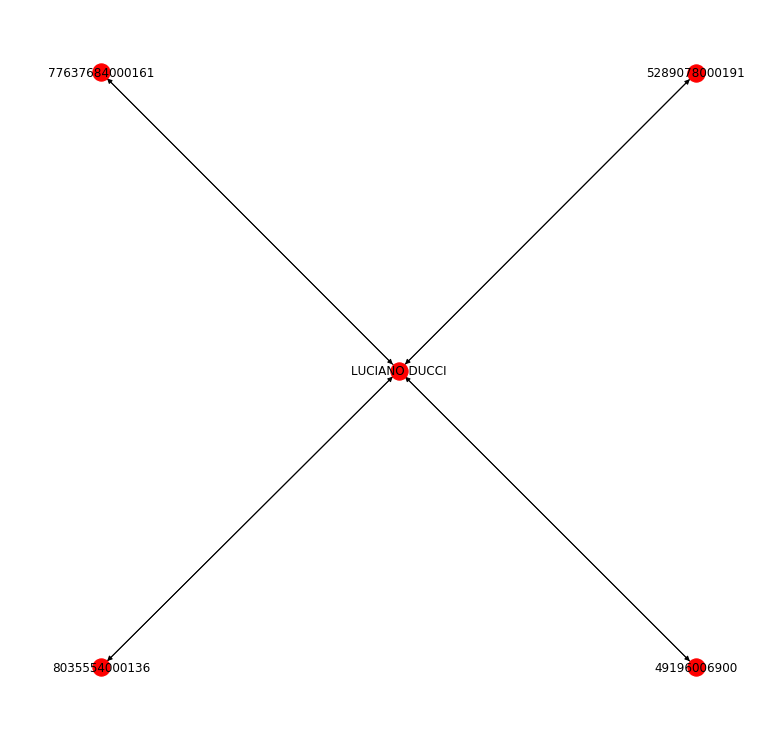

In [74]:
# 1.4.2.2. Plotando rede de ciclos diretos para um deputado específico
plt.rcParams.update({
    'figure.figsize': (10,10),
    'axes.spines.right': True,
    'axes.spines.left': True,
    'axes.spines.top': True,
    'axes.spines.bottom': True})
deputado = "LUCIANO DUCCI"
lista_subset_graph = list(df_ciclos_diretos[df_ciclos_diretos["3_nome_deputado"] == deputado]["1_id_empresa"]) + [deputado]
H = G.subgraph(lista_subset_graph)
nx.draw(H, style = "solid", with_labels = True)
plt.savefig("/home/gustavo/Downloads/Redes/Grafos/ciclos_LD.png")  # save as png
plt.show()  # display

In [75]:
# 1.4.3.1. Criando tabela com resumo dos ciclos indiretos cruzados
lista_ciclos_cruzados = []
count = 0
for i in ciclos:
    if len(i) == 4:
        dict_i = {}
        if len(G.node[i[0]]) == 1:
            dict_i["1_id_empresa_a"] = i[0]
            dict_i["2_nome_empresa_a"] = G.node[i[0]]["nome_entidade"]
            dict_i["3_nome_deputado_x"] = i[1]
            dict_i["4_valor_doado_ax"] = G[i[0]][i[1]]["valor"]
            dict_i["5_qtde_doacoes_ax"] = G[i[0]][i[1]]["qtde"]
            dict_i["6_id_empresa_b"] = i[2]
            dict_i["7_nome_empresa_b"] = G.node[i[2]]["nome_entidade"]
            dict_i["8_valor_reembolsado_xb"] = G[i[1]][i[2]]["valor"]
            dict_i["9_qtde_reembolsos_xb"] = G[i[1]][i[2]]["qtde"]
            dict_i["10_nome_deputado_y"] = i[3]
            dict_i["11_valor_doado_by"] = G[i[2]][i[3]]["valor"]
            dict_i["12_qtde_doacoes_by"] = G[i[2]][i[3]]["qtde"]
            dict_i["13_valor_reembolsado_ya"] = G[i[3]][i[0]]["valor"]
            dict_i["14_qtde_reembolsos_ya"] = G[i[3]][i[0]]["qtde"]
        else:
            dict_i["1_id_empresa_a"] = i[3]
            dict_i["2_nome_empresa_a"] = G.node[i[3]]["nome_entidade"]
            dict_i["3_nome_deputado_x"] = i[0]
            dict_i["4_valor_doado_ax"] = G[i[3]][i[0]]["valor"]
            dict_i["5_qtde_doacoes_ax"] = G[i[3]][i[0]]["qtde"]
            dict_i["6_id_empresa_b"] = i[1]
            dict_i["7_nome_empresa_b"] = G.node[i[1]]["nome_entidade"]
            dict_i["8_valor_reembolsado_xb"] = G[i[0]][i[1]]["valor"]
            dict_i["9_qtde_reembolsos_xb"] = G[i[0]][i[1]]["qtde"]
            dict_i["10_nome_deputado_y"] = i[2]
            dict_i["11_valor_doado_by"] = G[i[1]][i[2]]["valor"]
            dict_i["12_qtde_doacoes_by"] = G[i[1]][i[2]]["qtde"]
            dict_i["13_valor_reembolsado_ya"] = G[i[2]][i[3]]["valor"]
            dict_i["14_qtde_reembolsos_ya"] = G[i[2]][i[3]]["qtde"]
        lista_ciclos_cruzados.append(dict_i)
    count += 1
    print(count)

df_ciclos_cruzados = pd.DataFrame(lista_ciclos_cruzados)
df_ciclos_cruzados.to_csv("/home/gustavo/Downloads/Redes/Tabelas_Gerada/df_ciclos_cruzados.csv", index = False)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116


In [76]:
df_vinculos_reembolsos['id_empresa'] = df_vinculos_reembolsos['id_empresa'].apply(int)
df_vinculos_receitas['id_empresa'] = pd.to_numeric(df_vinculos_receitas['id_empresa'], errors='coerce')
df_vinculos_receitas = df_vinculos_receitas.dropna(subset=['id_empresa'])
df_vinculos_receitas['id_empresa'] = df_vinculos_receitas['id_empresa'].apply(int)

In [77]:
# 1.5. Criando tabela de resumo das empresas (Empresa, Doado, Reembolsado)

df_resumo_empresas_inner = pd.merge(df_vinculos_receitas.groupby(["id_empresa", "nome_empresa"]).agg({"valor": "sum"}).reset_index(), 
df_vinculos_reembolsos.groupby(["id_empresa"]).agg({"valor": "sum"}).reset_index(), on='id_empresa', how='inner')

df_resumo_empresas_inner.columns = ['id_empresa', 'nome_empresa', 'valor_doado', 'valor_reembolsado']

df_resumo_empresas_inner["percentual_de_retorno"] = 100 * (df_resumo_empresas_inner["valor_reembolsado"] - df_resumo_empresas_inner["valor_doado"])/df_resumo_empresas_inner["valor_doado"]


df_resumo_empresas_inner["percentual_de_retorno"] = df_resumo_empresas_inner["percentual_de_retorno"]
df_resumo_empresas_inner.to_csv("/home/gustavo/Downloads/Redes/Tabelas_Gerada/df_resumo_empresas_inner.csv", index = False)

df_resumo_empresas_left = pd.merge(df_vinculos_receitas.groupby(["id_empresa", "nome_empresa"]).agg({"valor": "sum", "nome_deputado": "count"}).reset_index(), df_vinculos_reembolsos.groupby(["id_empresa"]).agg({"valor": "sum", "nome_deputado": "count"}).reset_index(), on='id_empresa', how='left')
df_resumo_empresas_left.columns = ['id_empresa', 'nome_empresa', 'valor_doado',"qtde_deputados_recebedores", 'valor_reembolsado', "qtde_deputados_pagadores"]
df_resumo_empresas_left['valor_doado'].apply(float)

for i in ["valor_doado","qtde_deputados_recebedores","valor_reembolsado","qtde_deputados_pagadores"]:
    def escala(x):
        y =  round((x - df_resumo_empresas_left[i].min())/(df_resumo_empresas_left[i].max() - df_resumo_empresas_left[i].min()),6)
        return y
    nome_coluna_escala = (i + "_escala")
    df_resumo_empresas_left[nome_coluna_escala] = df_resumo_empresas_left[i].map(escala)
    print(i)

df_resumo_empresas_left["indice_de_influencia"] = df_resumo_empresas_left["valor_doado_escala"] + df_resumo_empresas_left["qtde_deputados_recebedores_escala"] + df_resumo_empresas_left["valor_reembolsado_escala"] + df_resumo_empresas_left["qtde_deputados_pagadores_escala"]
df_resumo_empresas_left.to_csv("/home/gustavo/Downloads/Redes/Tabelas_Gerada/df_resumo_empresas_left.csv", index = False)

valor_doado
qtde_deputados_recebedores
valor_reembolsado
qtde_deputados_pagadores


In [78]:
def comunidade(i):
        
        if i < 0:
            return 'Mal investmento'
        elif i >=1 and i < 50:
            return 'Investimento mediano'
        elif i >= 50 and i <=100:
            return 'Bom investimento'
        elif i > 100 and i <=1000:
            return 'Ótimo investimento'
        elif i > 1000:
            return 'Excelente investimento'
        

df_resumo_empresas_inner['classificacao_roi'] = df_resumo_empresas_inner['percentual_de_retorno'].map(comunidade)


In [79]:
# 1.6. Criando tabela de resumo dos deputados (Empresa, Recebido, Reembolsado)
df_resumo_deputados_left = pd.merge(df_vinculos_receitas.groupby(["nome_deputado"]).agg({"valor": "sum", "id_empresa": pd.Series.nunique}).reset_index(), df_vinculos_reembolsos.groupby(["nome_deputado"]).agg({"valor": "sum", "id_empresa": pd.Series.nunique}).reset_index(), on='nome_deputado', how='left')
df_resumo_deputados_left.columns = ['nome_deputado', 'valor_recebido_doacoes', 'qtde_empresas_doadoras',"valor_pago_despesas", 'qtde_empresas_recebedoras']


for i in ["valor_recebido_doacoes","qtde_empresas_doadoras","valor_pago_despesas","qtde_empresas_recebedoras"]:
    def escala(x):
        y = float((x - df_resumo_deputados_left[i].min())/(df_resumo_deputados_left[i].max() - df_resumo_deputados_left[i].min()))
        return y
    nome_coluna_escala = (i + "_escala")
    df_resumo_deputados_left[nome_coluna_escala] = df_resumo_deputados_left[i].map(escala)
    print(i)

df_resumo_deputados_left["indice_de_influencia"] = df_resumo_deputados_left["valor_recebido_doacoes_escala"] + df_resumo_deputados_left["qtde_empresas_doadoras_escala"] + df_resumo_deputados_left["valor_pago_despesas_escala"] + df_resumo_deputados_left["qtde_empresas_recebedoras_escala"]
df_resumo_deputados_left.to_csv("/home/gustavo/Downloads/Redes/Tabelas_Gerada/df_resumo_deputados_left.csv")

valor_recebido_doacoes
qtde_empresas_doadoras
valor_pago_despesas
qtde_empresas_recebedoras


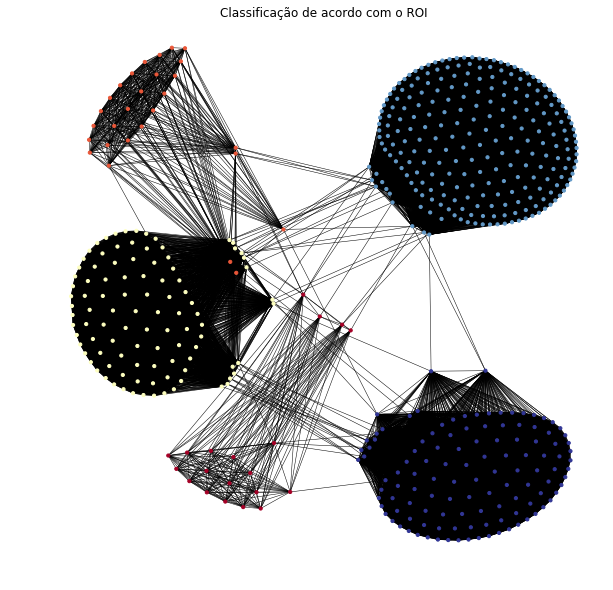

In [80]:
#2.0 Gerando grafos
#2.1 Rede representando a o retorno sobre o investimento
import itertools as it

G = nx.cubical_graph()
G.add_nodes_from([a for a in df_resumo_empresas_inner.index])
for ie in set(df_resumo_empresas_inner['id_empresa']):
    indices = df_resumo_empresas_inner[df_resumo_empresas_inner['id_empresa'] == ie].index
    G.add_edges_from(it.product(indices, indices))
    
for cr in set(df_resumo_empresas_inner['classificacao_roi']):
    indices = df_resumo_empresas_inner[df_resumo_empresas_inner['classificacao_roi']==cr].index
    G.add_edges_from(it.product(indices, indices))


plt.title('Classificação de acordo com o ROI')
color_mapping = {'Mal investmento': 250,
                 'Investimento mediano':50,
                 'Bom investimento':1,
                 'Ótimo investimento': 150,
                 'Excelente investimento': 300 }

#plt.figure(figsize=(7.5,7.5))
nx.draw(G,pos = nx.kamada_kawai_layout(G),node_size = 10, width = 0.5, 
        node_color=df_resumo_empresas_inner['classificacao_roi'].replace(color_mapping),with_labels=False,
        cmap='RdYlBu', vmin=0, vmax=300) 
plt.axis('off')
plt.savefig('ROI')
plt.show()

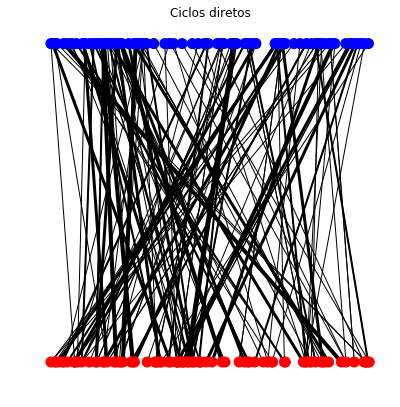

In [81]:
import random
import numpy as np

G = nx.Graph()
G.add_nodes_from(df_ciclos_diretos['1_id_empresa'], type_='1_id_empresa')
for node in G.nodes:
    G.nodes[node]['2_nome_empresa'] = df_ciclos_diretos[df_ciclos_diretos['1_id_empresa'] == node]['2_nome_empresa'].values[0]
    
G.add_nodes_from(df_ciclos_diretos['3_nome_deputado'], type_='3_nome_deputado')

df_ciclos_diretos['peso'] = df_ciclos_diretos['8_percentual_retorno'].apply(
lambda x: round(np.log(x),3))

G.add_weighted_edges_from(df_ciclos_diretos[['1_id_empresa', '3_nome_deputado', 'peso']].values)


colors = ['#0000FF' if G.nodes[n]['type_'] == '1_id_empresa' else '#FF0000' for n in G.nodes]
pos = {
    n: (
        random.random(),
        1 if G.nodes[n]['type_'] == '1_id_empresa' else 0,
    )
    for n in G.nodes

}

weigthed_pos = nx.spring_layout(G, pos=pos)
edge_width = [a[2]['weight']//2 for a in G.edges(data=True)]

plt.figure(figsize=(5,5))

nx.draw(G, pos = pos, node_color=colors, node_size = 100, with_labels=False, edge_cmap=plt.cm.Greys)
nx.draw_networkx_edges(G, pos=pos,width=edge_width)
plt.title('Ciclos diretos')
plt.axis('off')
plt.savefig('/home/gustavo/Downloads/Redes/Grafos/Ciclos diretos.png')
#plt.show()
#G.edges[(13524791000109, 'DIONILSO MATEUS MARCON')]

In [47]:
df = pd.DataFrame()
df = df_reembolso_resumo[df_reembolso_resumo.cnpj_cpf_empresa.apply(lambda x: len(str(x)) != 11)]
df = df[df.soma_valor_reembolso > 20000]
df = df[df.nome_completo != 'sem_info']


In [14]:
df_reembolso_resumo.to_csv("/home/gustavo/Downloads/Redes/Tabelas_Gerada/reembolso_resumo.csv", index = False)


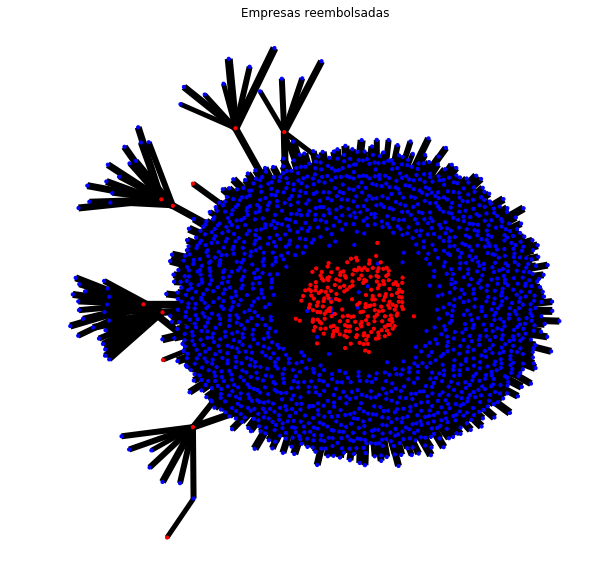

In [48]:
G = nx.Graph()
G.add_nodes_from(df['cnpj_cpf_empresa'], type_='cnpj_cpf_empresa')
for node in G.nodes:
    G.nodes[node]['fornecedor'] = df[df['cnpj_cpf_empresa'] == node]['fornecedor'].values[0]

G.add_nodes_from(df['nome_completo'], type_='nome_completo')

df['peso'] = (df['soma_valor_reembolso'].apply(lambda x: round(np.log(x), 3))) + df['qtde_reembolsos'].apply(lambda x: round(np.log(x), 3)) 

G.add_weighted_edges_from(df[['cnpj_cpf_empresa', 'nome_completo', 'peso']].values)
                                         
colors = ['#0000FF' if G.nodes[n]['type_'] == 'cnpj_cpf_empresa' else '#FF0000' for n in G.nodes]
edge_width = [a[2]['weight']//2 for a in G.edges(data=True)]

plt.figure(figsize=(7.5,7.5))

nx.draw(G, pos = nx.kamada_kawai_layout(G), node_size = 10, node_color = colors, with_labels=False, edge_cmap=plt.cm.Blues)
nx.draw_networkx_edges(G, pos=nx.kamada_kawai_layout(G),width=edge_width)
plt.title('Empresas reembolsadas')
plt.axis('off')
plt.savefig('/home/gustavo/Downloads/Redes/Grafos/Empresas_reembolsadas.png')
plt.show()


In [54]:
G.number_of_nodes()

102

In [44]:
df

,partido,uf,num_agente_politico,fornecedor,cnpj_cpf_empresa,soma_valor_reembolso,qtde_reembolsos,nome_completo
1113,AVANTE,MG,160510.0,ANDRESSA TAYANE DE ASSIS,21191504000106,8000.00,1,LUIS HENRIQUE DE OLIVEIRA RESENDE
1166,AVANTE,MG,160510.0,CARLINHOS ULTRALEVES LTDA,5569646000108,23038.00,4,LUIS HENRIQUE DE OLIVEIRA RESENDE
1195,AVANTE,MG,160510.0,CELULAR FUNCIONAL,1,21589.00,119,LUIS HENRIQUE DE OLIVEIRA RESENDE
1206,AVANTE,MG,160510.0,CONDOMINIO DO EDIFICIO MARBLE ARCH,38732285000128,17782.95,11,LUIS HENRIQUE DE OLIVEIRA RESENDE
1207,AVANTE,MG,160510.0,CONDOMÍNIO ED. MARBLE ARC,38732285000128,45517.18,30,LUIS HENRIQUE DE OLIVEIRA RESENDE
1240,AVANTE,MG,160510.0,Cia Aérea - AZUL,9296295000160,194897.22,326,LUIS HENRIQUE DE OLIVEIRA RESENDE
1241,AVANTE,MG,160510.0,Cia Aérea - AZUL,9296295000160,67323.68,104,LUIS HENRIQUE DE OLIVEIRA RESENDE
1242,AVANTE,MG,160510.0,Cia Aérea - GOL,7575651000159,75436.44,384,LUIS HENRIQUE DE OLIVEIRA RESENDE
1243,AVANTE,MG,160510.0,Cia Aérea - GOL,7575651000159,20600.51,40,LUIS HENRIQUE DE OLIVEIRA RESENDE
1246,AVANTE,MG,160510.0,Cia Aérea - TAM,2012862000160,115750.50,219,LUIS HENRIQUE DE OLIVEIRA RESENDE


In [52]:
df_ciclos_diretos

,1_id_empresa,2_nome_empresa,3_nome_deputado,4_valor_doado,5_qtde_doacoes,6_valor_reembolsado,7_qtde_reembolsos,8_percentual_retorno,peso
0,13524791000109,JL Consultores,DIONILSO MATEUS MARCON,750.00,1,36000.00,1,4800.00,8.476
1,11601349000103,E.M COMERCIO DE COMBUSTIVEIS LTDA,LUCIO ANTONIO MOSQUINI,9996.00,1,183.74,1,1.84,0.610
2,4707821000113,SOJA COMERCIO DE DERIVADOS DE PETROLEO LTDA,LUCIO ANTONIO MOSQUINI,27350.00,1,241.22,1,0.88,-0.128
3,20629347000105,STAR TUR VIAGENS E TURISMO LTDA-EPP,LUCIO ANTONIO MOSQUINI,49500.00,1,3610.00,1,7.29,1.987
4,24186785000105,SOMAPETRO COMERCIO E TRANSPORTES LTDA,CARLOS ALBERTO DE SOUSA ROSADO SEGUNDO,58000.00,3,196.03,1,0.34,-1.079
5,12053850000137,GRAAL OURINHOS,JOSE AUGUSTO ROSA,5000.00,1,410.55,2,8.21,2.105
6,87687489000108,POSTO DE COMBUSTIVEIS VACCARI LTDA,ELVINO JOSE BOHN GASS,1250.14,1,2824.33,13,225.92,5.420
7,84841931000102,AJIR ARTES GRAFICAS E EDITORA LTDA - EPP,CHRISTIANE DE SOUZA YARED,380.00,2,750.00,1,197.37,5.285
8,4197917368,YARA MARIA LIRA PAIVA E SILVA,ATILA FREITAS LIRA,300.00,1,7200.00,12,2400.00,7.783
9,83336532191,Marcones Ribeiro de Castro,VICENTE ALVES DE OLIVEIRA JUNIOR,8500.00,2,10000.00,2,117.65,4.768


In [53]:
############ Gerando grafo em d3 para visualizar em HTML ###############
# Neste caso é necessátio utilizar o arquivo HTML de template

import json
import os
import re

# montar dicionario de nós e arestas
deputado = "LUCIANO DUCCI"
lista_subset_graph = list(df_ciclos_diretos[df_ciclos_diretos["3_nome_deputado"] == deputado]["1_id_empresa"]) + [deputado]
H = G.subgraph(lista_subset_graph)

json_txt = dict()
json_txt["nodes"] = []
json_txt["links"] = []

for i in lista_subset_graph:
    dict_i = {}
    dict_i["id"] = str(i)
    dict_i["group"] = str(1)
    dict_i["size"] = str(3)
    json_txt["nodes"].append(dict_i)

for j in H.edges():
    dict_j = {}
    dict_j["source"] = str(j[0])
    dict_j["target"] = str(j[1])
    dict_j["value"] = str(H[j[0]][j[1]]["valor"])
    json_txt["links"].append(dict_j)


html = ''
with open(os.path.join('visualizar_grafo_template.html'), 'r', encoding='utf-8') as arq:
    html = ''.join(arq.readlines())

path_html_final = os.path.join('visualizar_grafo.html')
with open(path_html_final, 'w', encoding='utf-8') as arq:
    json_str = json.dumps(json_txt)
    html = re.sub('"{{json_data}}"', json_str, html)
    arq.write(html)

import webbrowser
webbrowser.open('file://' + os.path.realpath(path_html_final))

######################

KeyError: '6_valor_reembolsado'